# Determinação da temperatua adiabática de chama da combustão do gás de síntese

## Autores:
### Dr. R. G. Leão Jr. 
### Dr. R. C. Carpio

#### Introdução
Esta é uma versão primária de um notebook para determinação da temperatura adiabática de chama para a combustão do gás de síntese. Aspectos teóricos deverão futuramente ser inseridos nessa seção. 

#### Metodologia
A simulação do processo é realizada utilizando o software Cantera por meio de sua interface Python implementando um modelo de chama unidimensional.

##### Método de Estagnação de Fluxo
O cantera utiliza um método derivado do proposto por Kee *et al* (2017) para a estagnação axissimétrica do fluxo de gás, reduzindo as equações governantes tridimensionais para uma aproximação unidimensional centrada no eixo de estagnação.

A continuidade do fluxo é determinada segundo a Equação 1, onde $\rho$ é a densidade, *u* é a velocidade axial, $v$ é a velocidade radial, $r$, a distância radial até o exio de estagnação e $V = v/r$.

$$
\dfrac{{\partial{\rho u}}}{{\partial z}} + 2 \rho V = 0 \quad (1)
$$

Para a energia é usado o método 

##### Parametrização Fisico-Química
O balanço de massa do processo estudado foi realizado segundo o método de (citar trabalho do Moisés) resultado na Equação 2 com coeficientes dados dados em $kmol.s^{-1}$

$$
0.0446 \cdot CO + 0.1540 \cdot H_{2} + 0.0310 \cdot H_{2}O + 0.0036 \cdot CH_{4} \dots 
$$
$$
\dots + 0.0941 \cdot N_2 + 0.0189 \cdot CO2 + 0.5139 \cdot (O_2 + 3.76 \cdot N_2) \rightarrow \dots \quad (2)
$$
$$
0.0671 \cdot CO_2 + 0.1921 \cdot H_{2}O + 2.0264 \cdot N_2 + 0
.2326 \cdot O_2 
$$

As condições iniciais da simulação foram selecionadas como pressão 1 atm, temperatura absoluta 300 K e comprimento $z$ da chama de 0.03 m, conforme as variáveis inicializadas abaixo. 

In [1]:
import cantera as ct
p = ct.one_atm  # Pressão [Pa]
Tin = 300  # temperatura inicial do gás [K]
reactants = 'CO:44.6, H2: 154.0, H2O:31.0, CH4:3.6, N2:2026.4, CO2:18.9, O2:513.9'  # Composição da pré mistura
width = 0.03  # tamanho (m)
loglevel = 1  # amount of diagnostic output (0 to 8) ??

O mecanismo de reação selecionado para a solução do problema foi o GRI-MECH3.0 (citar fonte) e os parâmetros termoquímicos de lá retirados

In [2]:
# Solução gasosa para análise
gas = ct.Solution('gri30_n.yaml') # verificar mecanismo
gas.TPX = Tin, p, reactants # condições iniciais da mistura 

CanteraError: 
***********************************************************************
CanteraError thrown by Application::findInputFile:

Input file gri30_n.yaml not found in directories 
'.', 
'/home/reginaldo/anaconda3/envs/ct-env/lib/python3.9/site-packages/cantera/data', 
'/home/reginaldo/anaconda3/envs/ct-env/share/cantera/data'

To fix this problem, either:
    a) move the missing files into the local directory;
    b) define environment variable CANTERA_DATA to
         point to the directory containing the file.
***********************************************************************


A chama foi modelada pela classe `FreeFlame` do Cantera. Esta classe implementa um chama de fluxo livre para um fluxo de gás ideal também derivado do Cantera disponibilizado pela classe `IdealGasFlow`. 

In [3]:
# Objeto chama do Cantera
f = ct.FreeFlame(gas, width=width) # passa o gás e determina o tamanho da chama 
f.set_refine_criteria(ratio=3, slope=0.06, curve=0.12) # refinamentos do modelo (estudar) 
#f.show_solution() # exibe a solução se necessário

Os parâmetros de transporte utilizados para os componentes do gás foram a difusão muticomponente feita por aproximação da média da mistura (citar G. Dixon-Lewis. Flame structure and flame reaction kinetics, II: Transport phenomena in multicomponent systems. Proc. Roy. Soc. A, 307:111--135, 1968.).

In [4]:
f.transport_model = 'Mix' 
f.solve(loglevel=1, auto=True)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      3.782
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004379      3.608
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04988      2.814
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.6392      1.524
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.788e-06      1.504
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.833e-10      1.504
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.658e-14      1.504
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps   
 
****

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         143.8    -0.7393
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps          1092     -1.455
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         460.6     -1.393
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         218.6    -0.9088
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         0.342     -1.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.881e-05     -1.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.034e-09     -1.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.688e-14     -1.785
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps   
 
*********************************************************

Attempt Newton solution of steady-state problem...    success.

Problem solved on [106] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 41 49 54 55 56 57 58 59 60 61 62 63 64 65 66 
    to resolve CH2O CH3OH H2O2 HO2 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [121] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 55 
    to resolve HO2 
##############################################################################


Os dados são salvos em arquivos tipo csv e então os resultados exibidos.

In [5]:
f.write_csv('adiabatic_flame_mix.csv', quiet=False)
print(f'mixture-averaged flame temperature = {f.T.max():.3f} K')

Solution saved to 'adiabatic_flame_mix.csv'.
mixture-averaged flame temperature = 924.127 K


A concentração dos gases combustíveis pode ser graficamente explorada por meio do arquivo csv salvo.

<IPython.core.display.Javascript object>


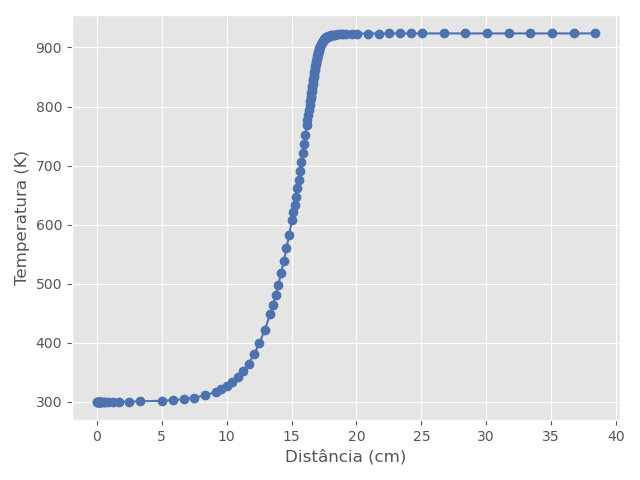

In [19]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.style.use("ggplot")
plt.style.use("seaborn-deep")
plt.rcParams["figure.autolayout"] = True
plt.plot(f.grid*10, f.T, "-o")
plt.xlabel("Distância (cm)")
plt.ylabel("Temperatura (K)");


<IPython.core.display.Javascript object>


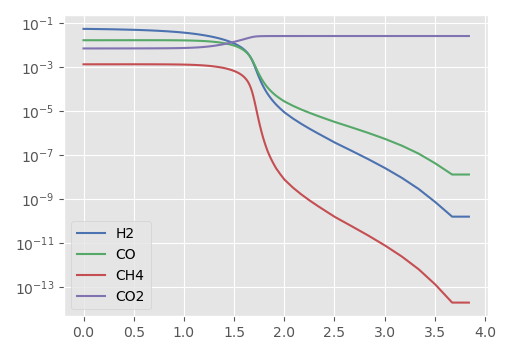

In [29]:
import pandas as pd
data = pd.read_csv('adiabatic_flame_mix.csv')
plt.plot(data["grid"], data["X_H2"], label="H2")
plt.plot(data["grid"], data["X_CO"], label="CO")
plt.plot(data["grid"], data["X_CH4"], label="CH4")
plt.plot(data["grid"], data["X_CO2"], label="CO2")
#plt.plot(data["grid"], data["X_O2"], label="O2")
plt.yscale("log")
plt.legend()

Para o uso de transporte multicomponente - este com maior custo computacional - a célula abaixo pode ser executada.

In [15]:
# Resolve a chama utilizando algoritmo de trasnporte multicomponete.
f.transport_model = 'Multi'
f.solve(loglevel=1)  # don't use 'auto' on subsequent solves
#f.show_solution()
f.write_csv('adiabatic_flame_multi.csv', quiet=False)
print(f'multicomponent flame temperature = {f.T.max():.3f} K')


..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [123] point grid(s).

..............................................................................
no new points needed in flame
Solution saved to 'adiabatic_flame_multi.csv'.
multicomponent flame temperature = 923.778 K


<IPython.core.display.Javascript object>


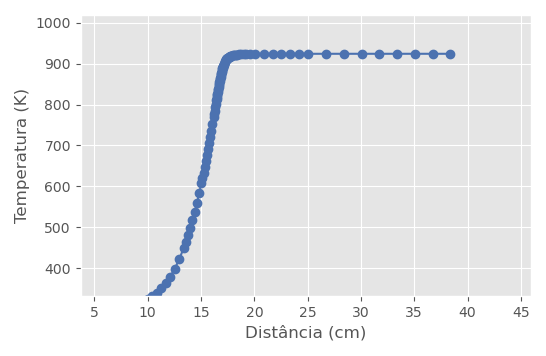

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
plt.style.use("ggplot")
plt.style.use("seaborn-deep")
plt.rcParams["figure.autolayout"] = True
plt.plot(f.grid * 10, f.T, "-o")
plt.xlabel("Distância (cm)")
plt.ylabel("Temperatura (K)");